# Plots for COVID Cross reactivity paper

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
all_donors = pd.read_excel('All donors_NoFloridaDonor.xlsx')

In [3]:
Fig2_Bal_V1 = pd.read_excel('Figure2B Bal Vit1 and 2.xlsx',sheet_name='Visit1')
Fig2_Bal_V2 = pd.read_excel('Figure2B Bal Vit1 and 2.xlsx',sheet_name='Visit2')

In [4]:
Fig2_C = pd.read_excel('Figure 2C aCD3CD28 M1.xlsx',sheet_name = 'Fig2_2C')

## Set font sizes

In [14]:
small_size= 12
medium_size= 15
large_size = 18
plt.rcParams["font.family"] = "arial"

## Log plots

In all the codes below, 'CP' stands for convalescent patient.

### Plot Figure 2 all donors

In [6]:
all_donors

,No.,SARS,M1,Condition
0,13474,11.55,18.931970,Convalescent
1,13476,27.85,41.873780,Convalescent
2,13509,13.68,7.257743,Convalescent
3,13512,89.29,108.512400,Convalescent
4,13514,24.44,79.609990,Convalescent
5,13516,321.85,497.642300,Convalescent
6,13519,70.77,36.992580,Convalescent
7,13522,29.08,25.911470,Convalescent
8,13528,6.50,12.672160,Convalescent
9,13646,35.40,8.700000,Convalescent


In [7]:
# Plot Figure 2 all donor graph
CP_SARS, CP_M1 = list(all_donors[(all_donors['Condition'] == 'Convalescent')]['SARS']), \
list(all_donors[(all_donors['Condition'] == 'Convalescent')]['M1'])

In [8]:
Healthy_SARS, Healthy_M1 = list(all_donors[(all_donors['Condition'] == 'Healthy')]['SARS']), \
list(all_donors[(all_donors['Condition'] == 'Healthy')]['M1'])

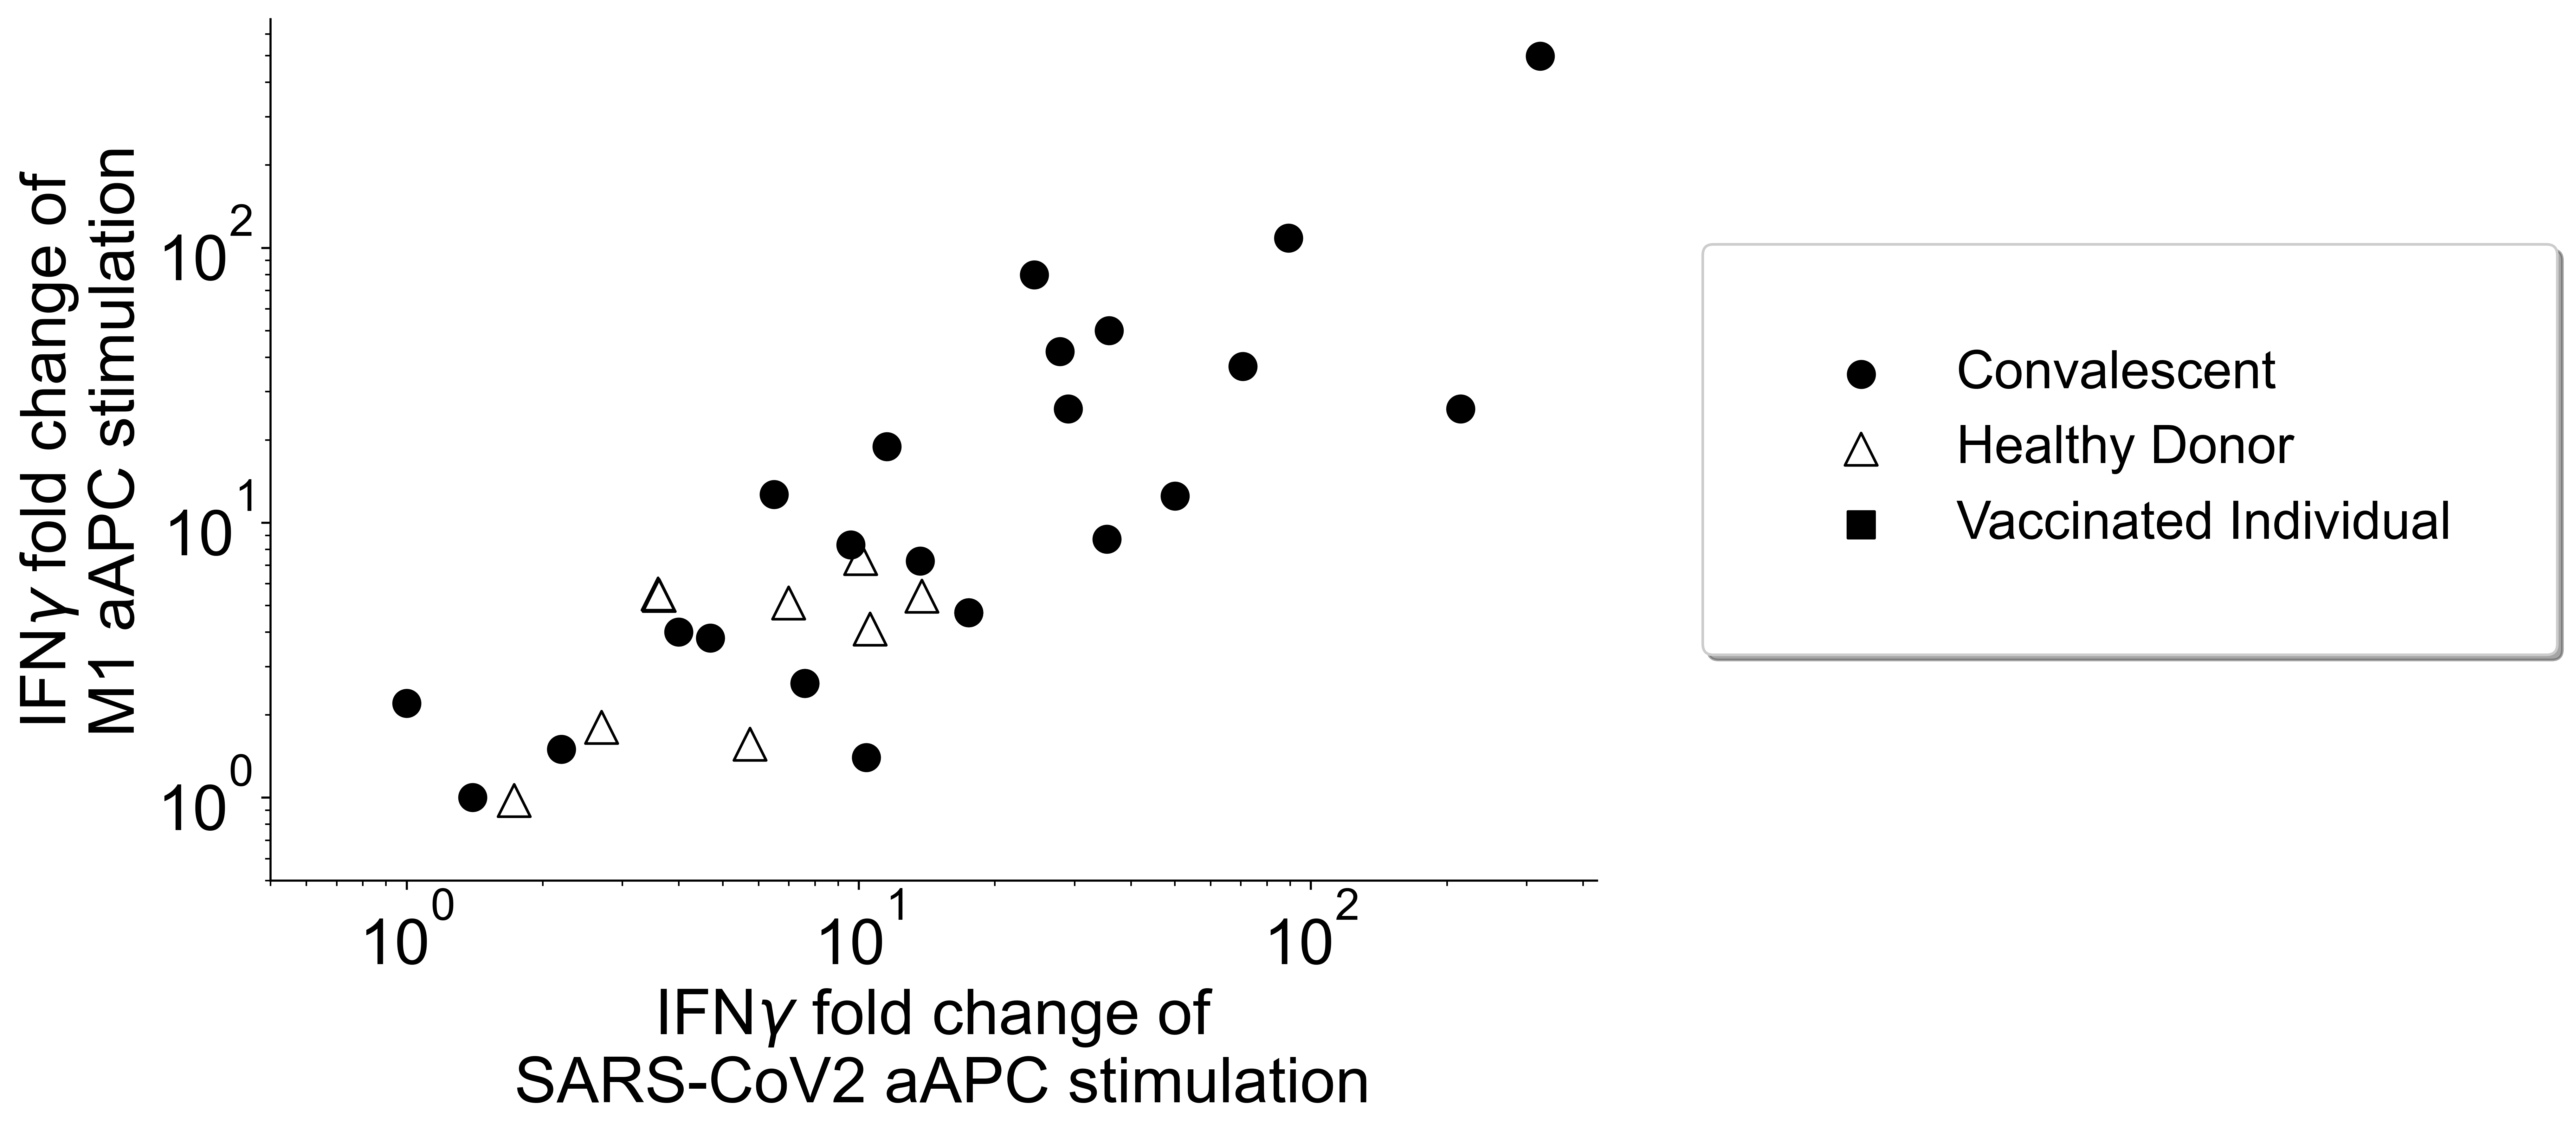

In [21]:
cir_size = 400*1
tri_size = 150*1
cross_size = 100*1
lab_size = 20
# Set up
Fig2_all = plt.figure(figsize = (18,6), dpi = 600)
# Scatter
ax = plt.subplot(111)
#ax = brokenaxes(xlims=((0, 80), (160, 400)), ylims=((0,120), (310, 600)), hspace=.1)
Convalescent = ax.scatter(CP_SARS,CP_M1, marker='.',color = 'k',s = cir_size)
Healthy = ax.scatter(Healthy_SARS,Healthy_M1, marker = '^',facecolors='none',color = 'k', s = tri_size)
Vaccinated = ax.scatter([],[],marker = ',',color ='k',s = 100)
# Axes Names
ax.set_xlabel('IFN$\gamma$ fold change of \n SARS-CoV2 aAPC stimulation')
ax.set_ylabel('IFN$\gamma$ fold change of \n M1 aAPC stimulation')
# Axis log scale
plt.yscale("log")
plt.xscale("log")
# Limits
plt.ylim(ymin=0.5) 
plt.xlim(xmin=0.5)
# Hide right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.rc('axes', labelsize=lab_size) 
plt.rc('xtick', labelsize=lab_size)
plt.rc('ytick', labelsize=lab_size) 
# Shrink axis and place box outside
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.5, box.height])

plt.legend([Convalescent,Healthy,Vaccinated],['Convalescent','Healthy Donor','Vaccinated Individual'],
           fancybox=True, framealpha=1, shadow=True,
           loc='center left', borderaxespad=2,
           bbox_to_anchor=(1, 0.5),
          borderpad = 2,
          prop={'size': 20})
# There are 3 patients whose T cells were used to perform expansion and ICS.
# ICS_cohort contains patients ['13519','158','159']
#ICS_cohort = all_donors.iloc[[6,22,23],:]
#for i, index in enumerate(ICS_cohort.index):
#    plt.annotate(index,
#                 (ICS_cohort[['SARS']].iloc[i,0],
#                 ICS_cohort[['M1']].iloc[i,0]),
#                 textcoords="offset points",
#                 xytext = (0,8),
#                 ha = 'center'
#    )
# Save
Fig2_all.savefig('all_donors_Annotate.png', bbox_inches='tight')

In [37]:
print(ICS_cohort.index)
ICS_cohort[['SARS']].iloc[1,0]


Int64Index([13519, 158, 159], dtype='int64', name='No.')


1.4

## Plot Fig 2 2 visits

In [16]:
Fig2_Bal_V1

,Patient No,SARS,M1,Condition
0,13528,6,13,Convalescent
1,13522,29,26,Convalescent
2,13516,322,498,Convalescent
3,13514,24,80,Convalescent
4,13519,71,37,Convalescent
5,13512,89,109,Convalescent
6,13509,14,7,Convalescent
7,13483,6,2,Healthy
8,13474,12,19,Convalescent
9,13482,2,1,Healthy


In [17]:
Fig2_Bal_V2

,Patient No,SARS,M1,Condition
0,13528,20,5,Convalescent
1,13522,27,12,Convalescent
2,13516,29,7,Convalescent
3,13514,23,7,Convalescent
4,13519,8,2,Convalescent
5,13512,44,25,Convalescent
6,13509,6,2,Convalescent
7,13483,45,9,Healthy
8,13474,7,3,Convalescent
9,13482,13,5,Healthy


In [18]:
# Organize data
Bal_V1_CP_SARS, Bal_V1_CP_M1 = list(Fig2_Bal_V1[(Fig2_Bal_V1['Condition'] == 'Convalescent')]['SARS']), \
list(Fig2_Bal_V1[(Fig2_Bal_V1['Condition'] == 'Convalescent')]['M1'])

Bal_V1_Healthy_SARS, Bal_V1_Healthy_M1 = list(Fig2_Bal_V1[(Fig2_Bal_V1['Condition'] == 'Healthy')]['SARS']), \
list(Fig2_Bal_V1[(Fig2_Bal_V1['Condition'] == 'Healthy')]['M1'])

Bal_V2_CP_SARS, Bal_V2_CP_M1 = list(Fig2_Bal_V2[(Fig2_Bal_V2['Condition'] == 'Convalescent')]['SARS']), \
list(Fig2_Bal_V2[(Fig2_Bal_V2['Condition'] == 'Convalescent')]['M1'])

Bal_V2_Healthy_SARS, Bal_V2_Healthy_M1 = list(Fig2_Bal_V2[(Fig2_Bal_V2['Condition'] == 'Healthy')]['SARS']), \
list(Fig2_Bal_V2[(Fig2_Bal_V2['Condition'] == 'Healthy')]['M1'])

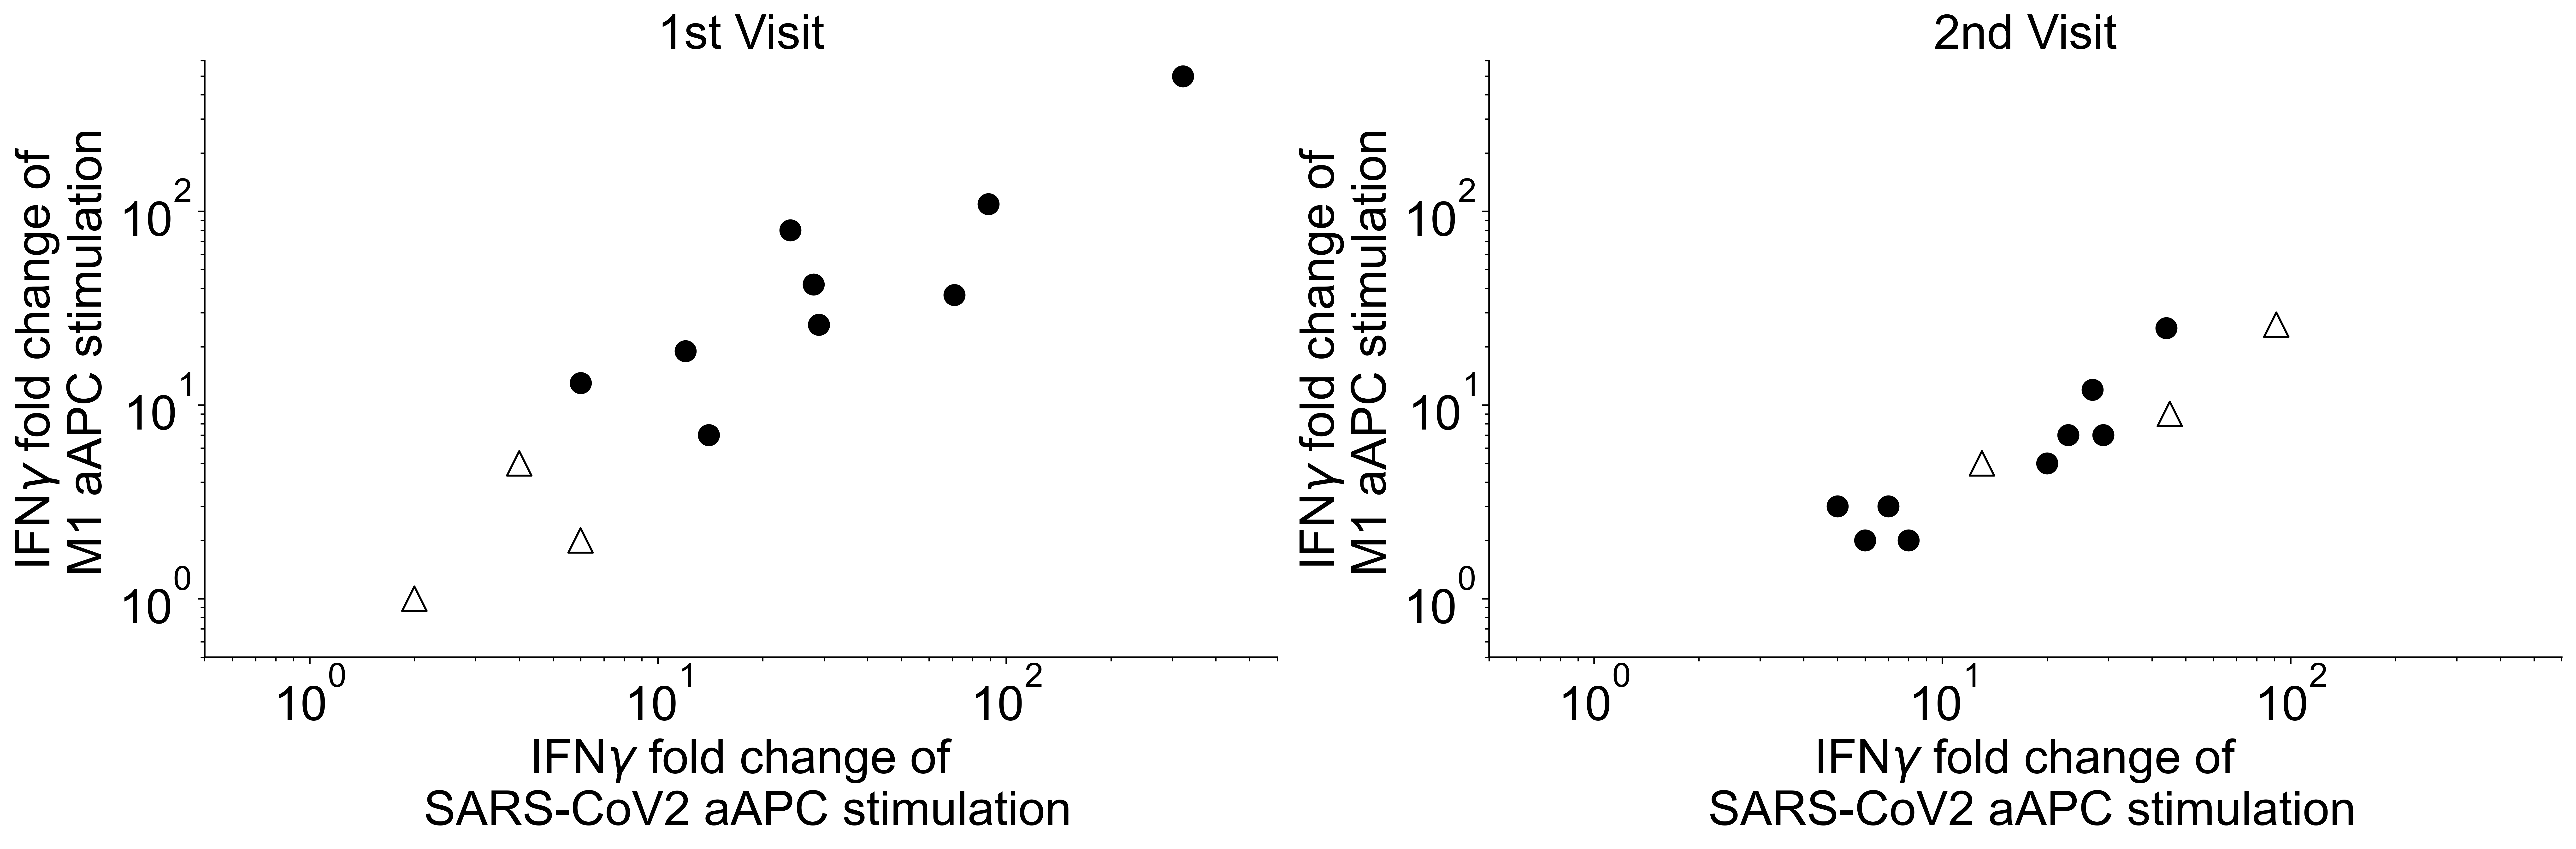

In [23]:
Fig2_2visit, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6),dpi = 600)
cir_size = 400
tri_size = 150
lab_size = 24
# Left--Visit 1
ax1.scatter(Bal_V1_CP_SARS,Bal_V1_CP_M1, marker='.',color = 'k',s = cir_size)
ax1.scatter(Bal_V1_Healthy_SARS,Bal_V1_Healthy_M1, marker = '^',facecolors = 'none',color = 'k', s = tri_size)
# Axis log scale
ax1.set_yscale('log')
ax1.set_xscale('log')
# Limits
ax1.set_ylim(ymin=0.5,ymax =600) 
ax1.set_xlim(xmin=0.5,xmax = 600)
# Hide right and top spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
# Axes Names
ax1.set_xlabel('IFN$\gamma$ fold change of \n SARS-CoV2 aAPC stimulation')
ax1.set_ylabel('IFN$\gamma$ fold change of \n M1 aAPC stimulation')
ax1.set_title('1st Visit',size = lab_size)

# Right --Visit 2
ax2.scatter(Bal_V2_CP_SARS,Bal_V2_CP_M1, marker='.',color = 'k',s = cir_size)
ax2.scatter(Bal_V2_Healthy_SARS,Bal_V2_Healthy_M1, marker = '^',facecolors = 'none',color = 'k', s = tri_size)
# Axis log scale
ax2.set_yscale('log')
ax2.set_xscale('log')
# Limits
ax2.set_ylim(ymin=0.5,ymax =600) 
ax2.set_xlim(xmin=0.5,xmax = 600)
# Hide right and top spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
# Axes Names
ax2.set_xlabel('IFN$\gamma$ fold change of \n SARS-CoV2 aAPC stimulation')
ax2.set_ylabel('IFN$\gamma$ fold change of \n M1 aAPC stimulation')
ax2.set_title('2nd Visit',size = lab_size)
plt.rc('axes', labelsize=lab_size) 
plt.rc('xtick', labelsize=lab_size)
plt.rc('ytick', labelsize=lab_size) 
plt.tight_layout()
# Save Fig
Fig2_2visit.savefig('2Visits.png',bbox_inches='tight')

## Plot Fig2B

In [24]:
Fig2_C

,Condition,SARS,M1,aCD3aCD28
0,Healthy,5,3,59
1,Healthy,2,3,3
2,Healthy,3,7,11
3,Convalescent,3,1,36
4,Convalescent,11,5,95
5,Healthy,65,16,171
6,Vaccinated,10,7,7
7,Healthy,3,2,276
8,Vaccinated,88,17,11
9,Vaccinated,20,7,6


In [25]:
# Organize data

# C1 (left)
C1_CP_SARS, C1_Healthy_SARS, C1_Vac_SARS = \
list(Fig2_C[(Fig2_C['Condition'] == 'Convalescent')]['SARS']), \
list(Fig2_C[(Fig2_C['Condition'] == 'Healthy')]['SARS']), \
list(Fig2_C[(Fig2_C['Condition'] == 'Vaccinated')]['SARS'])
C1_CP_M1, C1_Healthy_M1, C1_Vac_M1 = \
list(Fig2_C[(Fig2_C['Condition'] == 'Convalescent')]['M1']), \
list(Fig2_C[(Fig2_C['Condition'] == 'Healthy')]['M1']), \
list(Fig2_C[(Fig2_C['Condition'] == 'Vaccinated')]['M1'])

# C2 (right) share x axis with C1
C2_CP_aa, C2_Healthy_aa, C2_Vac_aa = \
list(Fig2_C[(Fig2_C['Condition'] == 'Convalescent')]['aCD3aCD28']),\
list(Fig2_C[(Fig2_C['Condition'] == 'Healthy')]['aCD3aCD28']),\
list(Fig2_C[(Fig2_C['Condition'] == 'Vaccinated')]['aCD3aCD28'])

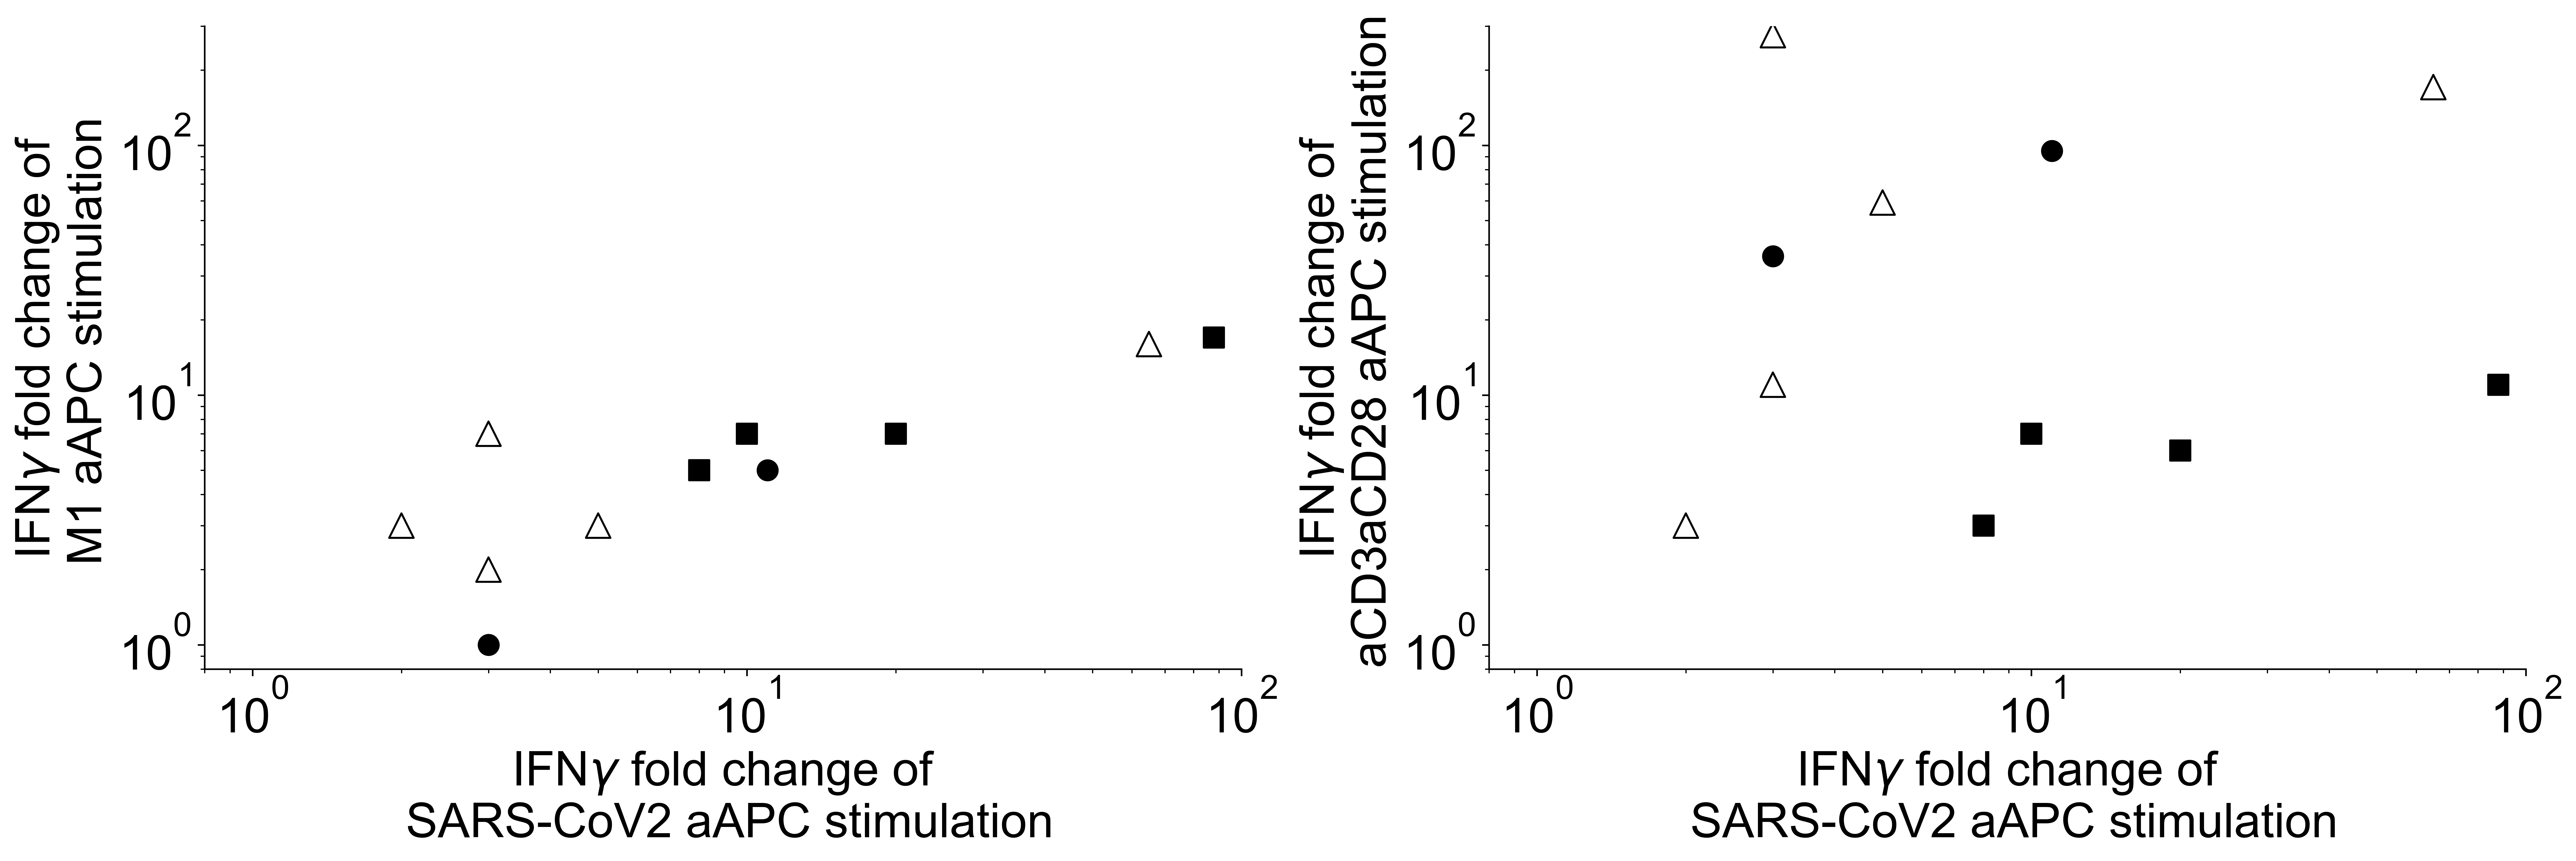

In [27]:
Fig2_2C, (C1, C2) = plt.subplots(1, 2,figsize=(18,6),dpi = 600)
cir_size = 400
tri_size = 150
cross_size = 100
lab_size = 24
# Left--M1 vs SARS_CoV2
C1.scatter(C1_CP_SARS,C1_CP_M1, marker='.',color = 'k',s = cir_size)
C1.scatter(C1_Healthy_SARS,C1_Healthy_M1, marker = '^',facecolors='none',color = 'k', s = tri_size)
C1.scatter(C1_Vac_SARS,C1_Vac_M1, marker = ',',color = 'k', s = cross_size)
# Axis log scale
C1.set_yscale('log')
C1.set_xscale('log')
# Limits
C1.set_ylim(ymin=0.8,ymax =300) 
C1.set_xlim(xmin=0.8,xmax = 100)
# Hide right and top spines
C1.spines['right'].set_visible(False)
C1.spines['top'].set_visible(False)
C1.yaxis.set_ticks_position('left')
C1.xaxis.set_ticks_position('bottom')
# Axes Names
C1.set_xlabel('IFN$\gamma$ fold change of \n SARS-CoV2 aAPC stimulation')
C1.set_ylabel('IFN$\gamma$ fold change of \n M1 aAPC stimulation')
#C1.set_title('Fig2C_left')

# Right -- aCD3aCD28 vs SARS_CoV2
C2.scatter(C1_CP_SARS,C2_CP_aa, marker='.',color = 'k',s = cir_size)
C2.scatter(C1_Healthy_SARS,C2_Healthy_aa, marker = '^',facecolors='none',color = 'k', s = tri_size)
C2.scatter(C1_Vac_SARS,C2_Vac_aa, marker = ',',color = 'k', s = cross_size)
# Limits
# Axis log scale
C2.set_yscale('log')
C2.set_xscale('log')
# Axis limits
C2.set_ylim(ymin=0.8,ymax =300) 
C2.set_xlim(xmin=0.8,xmax = 100)
# Hide right and top spines
C2.spines['right'].set_visible(False)
C2.spines['top'].set_visible(False)
C2.yaxis.set_ticks_position('left')
C2.xaxis.set_ticks_position('bottom')
# Axes Names
C2.set_xlabel('IFN$\gamma$ fold change of \n SARS-CoV2 aAPC stimulation')
C2.set_ylabel('IFN$\gamma$ fold change of \n aCD3aCD28 aAPC stimulation')
#C2.set_title('Fig2C_right')
# Font sizes
plt.rc('axes', labelsize=lab_size) 
plt.rc('xtick', labelsize=lab_size)
plt.rc('ytick', labelsize=lab_size) 
plt.tight_layout()
# Save Fig
Fig2_2C.savefig('Fig2C.png',bbox_inches='tight')